In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_data=pd.read_excel("Data_Train_lyst6947.xlsx")

In [3]:
train_data.head()
train_data.shape

(10683, 11)

In [4]:
train_data["Day_of_journey"]=pd.to_datetime(train_data["Date_of_Journey"]).dt.day
train_data["Month_of_journey"]=pd.to_datetime(train_data["Date_of_Journey"]).dt.month

train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [5]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [6]:
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_minute"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [7]:
train_data["Arr_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arr_minute"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute
train_data.drop(["Arrival_Time"],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [8]:
duration = list(train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]="0h " + duration[i]
            
duration_hours=[]
duration_min=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_min.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [9]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_min"]=duration_min
train_data.drop(["Duration"],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [10]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

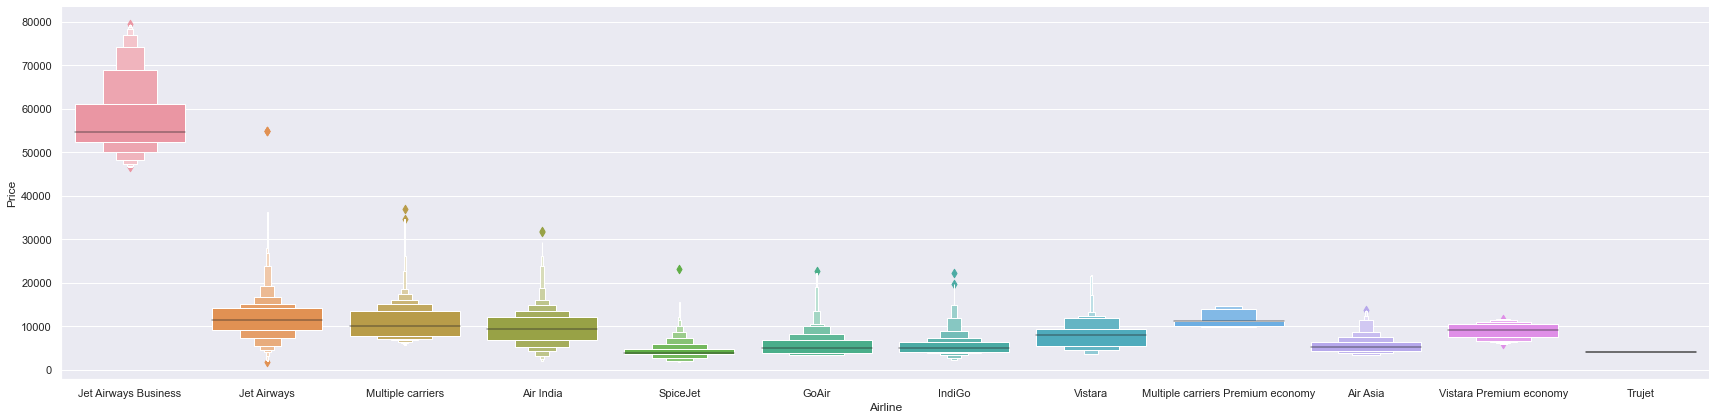

In [11]:
sns.catplot(y="Price",x="Airline", data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=4)
plt.show()

In [12]:
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline , drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [13]:
Source=train_data[["Source"]]
Source=pd.get_dummies(Source , drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [14]:
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [15]:
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [16]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [17]:
train_data.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4}, inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,16,50,21,35,4,45


In [19]:
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [20]:
 data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [21]:
 data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [22]:
data_train.shape

(10683, 30)



# Test Data Set 

In [23]:
test_data=pd.read_excel("Test_set_lyst5257.xlsx")

In [24]:
test_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [25]:
test_data["Day_of_journey"]=pd.to_datetime(test_data["Date_of_Journey"]).dt.day
test_data["Month_of_journey"]=pd.to_datetime(test_data["Date_of_Journey"]).dt.month

test_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [26]:
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_minute"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"],axis=1,inplace=True)
test_data.head()
test_data["Arr_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arr_minute"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop(["Arrival_Time"],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [27]:
duration = list(test_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]="0h " + duration[i]
            
duration_hours=[]
duration_min=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_min.append(int(duration[i].split(sep = 'm')[0].split()[-1]))
    
test_data["Duration_hours"]=duration_hours
test_data["Duration_min"]=duration_min
test_data.drop(["Duration"],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [28]:
Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline , drop_first=True)
Airline.head()

Source=test_data[["Source"]]
Source=pd.get_dummies(Source , drop_first=True)
Source.head()

Destination=test_data[["Destination"]]
Destination=pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [29]:
test_data.drop(["Route","Additional_Info"],axis=1,inplace=True)
test_data.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace=True)
data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)

In [30]:
data_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)
print(data_test.shape)
data_test.head()

(2671, 28)


,Total_Stops,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int64
 1   Day_of_journey                             2671 non-null   int64
 2   Month_of_journey                           2671 non-null   int64
 3   Dep_hour                                   2671 non-null   int64
 4   Dep_minute                                 2671 non-null   int64
 5   Arr_hour                                   2671 non-null   int64
 6   Arr_minute                                 2671 non-null   int64
 7   Duration_hours                             2671 non-null   int64
 8   Duration_min                               2671 non-null   int64
 9   Airline_Air India                          2671 non-null   uint8
 10  Airline_GoAir                              2671 

In [32]:
data_train.fillna(0,inplace=True)
data_train.isna().any()

Total_Stops                                  False
Price                                        False
Day_of_journey                               False
Month_of_journey                             False
Dep_hour                                     False
Dep_minute                                   False
Arr_hour                                     False
Arr_minute                                   False
Duration_hours                               False
Duration_min                                 False
Airline_Air India                            False
Airline_GoAir                                False
Airline_IndiGo                               False
Airline_Jet Airways                          False
Airline_Jet Airways Business                 False
Airline_Multiple carriers                    False
Airline_Multiple carriers Premium economy    False
Airline_SpiceJet                             False
Airline_Trujet                               False
Airline_Vistara                

# HEATMAP

In [33]:
data_train.columns

Index(['Total_Stops', 'Price', 'Day_of_journey', 'Month_of_journey',
       'Dep_hour', 'Dep_minute', 'Arr_hour', 'Arr_minute', 'Duration_hours',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [34]:
data_train.shape

(10683, 30)

In [35]:
X=data_train.loc[:, ['Total_Stops', 'Day_of_journey', 'Month_of_journey',
       'Dep_hour', 'Dep_minute', 'Arr_hour', 'Arr_minute', 'Duration_hours',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Day_of_journey,Month_of_journey,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,5,1,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2.0,6,9,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,5,12,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
y=data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

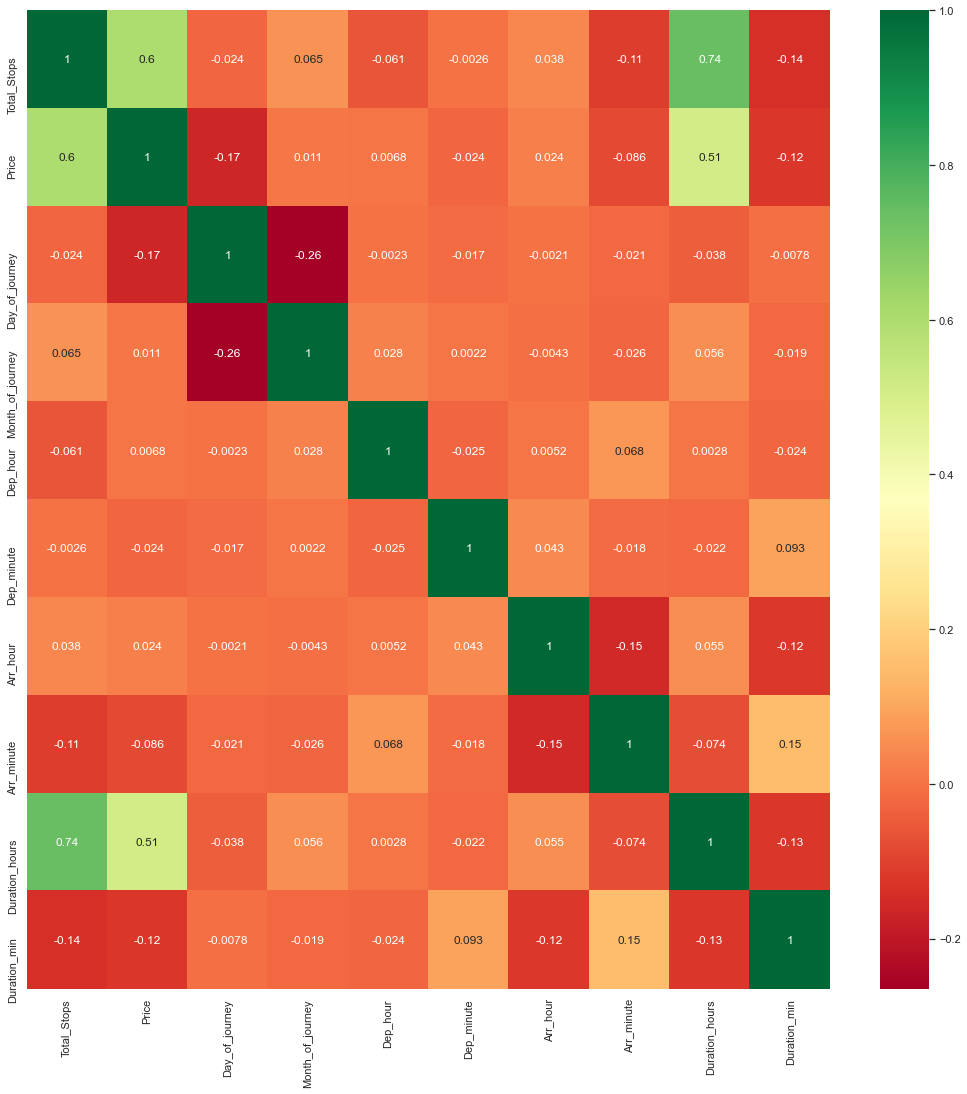

In [37]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")

plt.show()

In [38]:
X.isna().any()


Total_Stops                                  False
Day_of_journey                               False
Month_of_journey                             False
Dep_hour                                     False
Dep_minute                                   False
Arr_hour                                     False
Arr_minute                                   False
Duration_hours                               False
Duration_min                                 False
Airline_Air India                            False
Airline_GoAir                                False
Airline_IndiGo                               False
Airline_Jet Airways                          False
Airline_Jet Airways Business                 False
Airline_Multiple carriers                    False
Airline_Multiple carriers Premium economy    False
Airline_SpiceJet                             False
Airline_Trujet                               False
Airline_Vistara                              False
Airline_Vistara Premium economy

In [39]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [40]:
print(selection.feature_importances_)

[2.36687636e-01 1.10632207e-01 8.34438191e-02 2.59604124e-02
 2.25111155e-02 2.77554592e-02 2.15571807e-02 1.24125563e-01
 1.78152122e-02 1.02013767e-02 1.89925790e-03 1.78993350e-02
 1.32313629e-01 6.65160793e-02 1.71830549e-02 9.46270720e-04
 3.20308893e-03 9.79424129e-05 5.02224276e-03 1.31495340e-04
 5.78670472e-04 3.69113901e-03 4.13700042e-03 6.45765712e-03
 1.59619580e-02 1.39559582e-02 5.76399528e-03 4.88985446e-04
 2.30622577e-02]


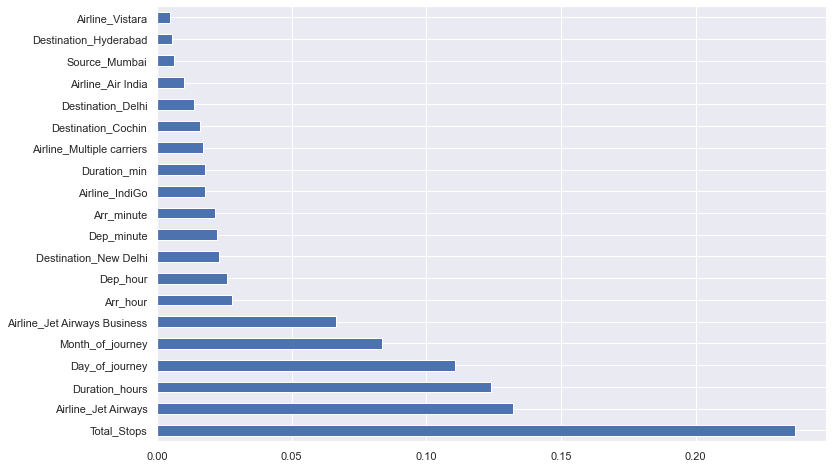

In [44]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [56]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [57]:
y_pred=reg_rf.predict(X_test)

In [58]:
reg_rf.score(X_train,y_train)

0.9532857056179604

In [54]:
reg_rf.score(X_test,y_test)

0.7875372557357114

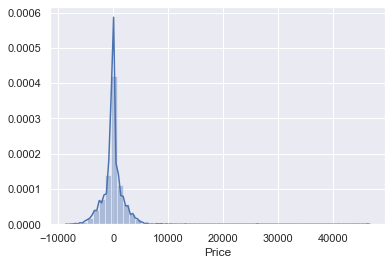

In [63]:
sns.distplot(y_test-y_pred)
plt.show()

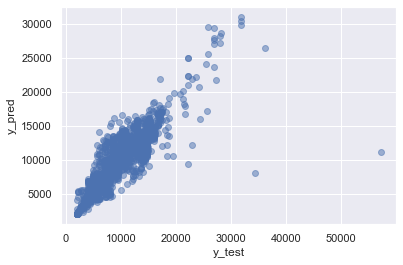

In [66]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
from sklearn import metrics

In [69]:
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MsE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  1199.5587750702089
MsE :  4572915.15670007
RMSE :  2138.4375503390484


In [70]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE/(max(y)-min(y))

0.027502958732641164

In [71]:
metrics.r2_score(y_test,y_pred)

0.7839291962258287

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
n_estimators = [int(x) for x in np.linspace(start = 100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth= [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [77]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [79]:
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=100)

In [80]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [81]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [82]:
prediction = rf_random.predict(X_test)

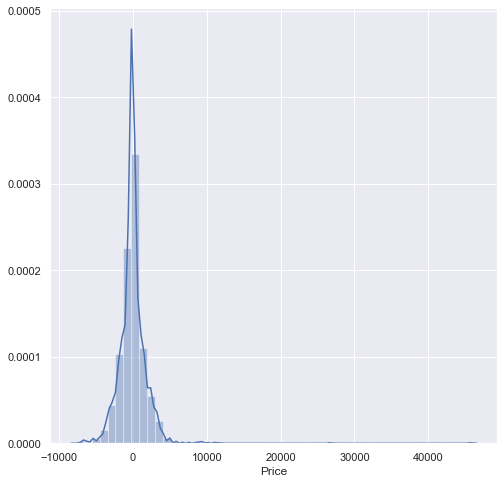

In [83]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show() 

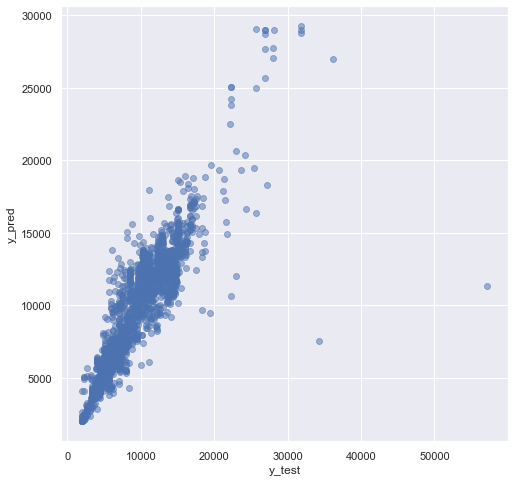

In [84]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [85]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MsE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE :  1172.3548650635362
MsE :  4197434.0744181005
RMSE :  2048.7640358074673


In [86]:
import pickle
file = open('flight_rf.pkl','wb')
pickle.dump(reg_rf,file)

In [88]:
model=open('flight_price_rf.pkl','rb')
forest=pickle.load(model)

In [89]:
y_prediction=forest.predict(X_test)

In [90]:
metrics.r2_score(y_test,y_prediction)

0.634002477006557